In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
###Read data
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data driven mkt/Final exam/Online Retail.xlsx")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


PART I: DATA CLEANING AND KPIs

1. Data Cleaning 
- Drop duplicated rows
- Delete records with the value of Quantity <= 0
- Filter out incomplete data for December 2011
- Drop records with null CustomerID

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df_check = df[['InvoiceNo','StockCode']]
df_check.duplicated().sum()

10684

In [ ]:
df['is_duplicated'] = df[['InvoiceNo','StockCode']].duplicated()

In [ ]:
df[df['is_duplicated'] == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_duplicated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False


In [ ]:
df = df.loc[df['Quantity'] > 0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_duplicated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [ ]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [ ]:
df = df[pd.notnull(df['CustomerID'])]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380620 entries, 0 to 516368
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      380620 non-null  object        
 1   StockCode      380620 non-null  object        
 2   Description    380620 non-null  object        
 3   Quantity       380620 non-null  int64         
 4   InvoiceDate    380620 non-null  datetime64[ns]
 5   UnitPrice      380620 non-null  float64       
 6   CustomerID     380620 non-null  float64       
 7   Country        380620 non-null  object        
 8   is_duplicated  380620 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.5+ MB


2. Calculate and Visualize the numbers of orders received per month

In [ ]:
##Create new column named year-month to extract year and month from InvoiceDate column using strftime
df['year_month'] = df['InvoiceDate'].apply(lambda x: x.strftime('%m/%Y'))

In [ ]:
##Groupby year-month column and count the number of unique InvoiceNo for each month and visualize it
group_customer = df.groupby('year_month').InvoiceNo.nunique()
group_customer

year_month
01/2011     987
02/2011     998
03/2011    1321
04/2011    1149
05/2011    1555
06/2011    1393
07/2011    1331
08/2011    1281
09/2011    1756
10/2011    1929
11/2011    2658
12/2010    1400
Name: InvoiceNo, dtype: int64

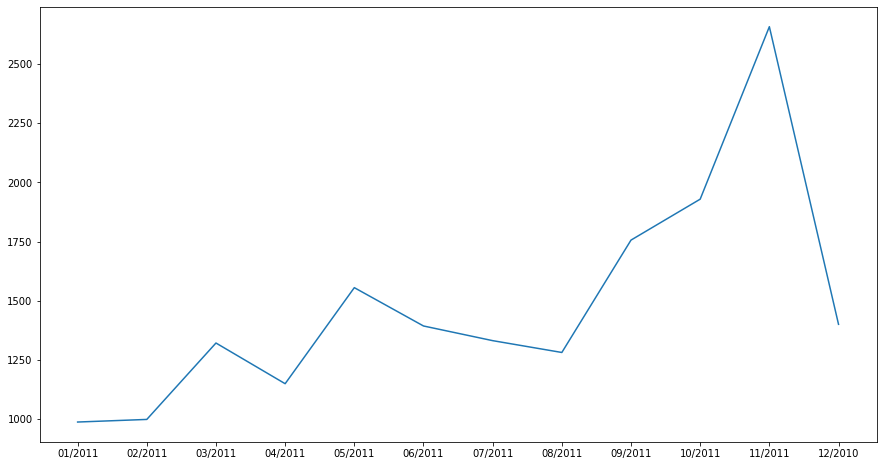

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(group_customer)

PART II: Customer Segmentation and CLV

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments.
   It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy.
   In this section we will practice implementing the customer segment based on the RFM model

1. Calculate Recency, Frequency, Monetary values for each customer. Store the result in a dataframe named the customer_df
- Frequency is the number of orders made by a customer. 
- Recency is the number of days counting from the last date a customer making an order to the last date in the analysis cycle.
For example if the last date in the analysis cycle is 30/11/2011, the last date a customer making an order is 25/11/2011. As a result, recency value is 5.
- Monetary is the total amount of money the customer has purchased during the analysis cycle.

In [ ]:
##Create a new dataframe named cusomter_df with only a column 'CustomerID'. Each row contains the ID of a CustomerID 
customer_df = pd.DataFrame()
customer_df['CustomerID'] = df['CustomerID']

In [ ]:
customer_df

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0
...,...
516364,15444.0
516365,15444.0
516366,15444.0
516367,15444.0


In [ ]:
##Create new column named ‘TotalRevenue’ as product of two columns Quantity and  UnitPrice
df['TotalRevenue'] = df['Quantity']*df['UnitPrice']

In [ ]:
import datetime
last_date = df['InvoiceDate'].max()
snapshot_date = last_date + datetime.timedelta(days=1)
recency = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days}).InvoiceDate
frequency = df.groupby(['CustomerID']).agg({'InvoiceNo': 'count'}).InvoiceNo
monetary = df.groupby(['CustomerID']).TotalRevenue.sum()

In [ ]:
customer_df = pd.DataFrame({'Frequency': frequency,  'Monetary': monetary, 'Recency': recency}).reset_index()
customer_df

,CustomerID,Frequency,Monetary,Recency
0,12346.0,1,77183.60,317
1,12347.0,171,4085.18,31
2,12348.0,31,1797.24,67
3,12349.0,73,1757.55,10
4,12350.0,17,334.40,302
...,...,...,...,...
4293,18280.0,10,180.60,269
4294,18281.0,7,80.82,172
4295,18282.0,7,100.21,118
4296,18283.0,706,1886.88,1


2. Add segment bin values to RFM table using quartile. For example, If the recency value belongs to the first quartile, the recency value will be replaced by 1, if it belongs to the second quartile, that value will be replaced by 2... 
- Hint: using pd.qcut, create new columns named r_quantile, f_quantile and m_quantile in the dataframe customer_df 

In [ ]:
customer_df['r_quantile'] = pd.qcut(customer_df['Recency'], 5, labels=[1,2,3,4,5]).astype('int')
customer_df['f_quantile'] = pd.qcut(customer_df["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]).astype('int')
customer_df['m_quantile'] = pd.qcut(customer_df['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype('int')

3. In the customer_df, Create a new column named RFM_Score. The formula for RFM_Score is as follow
             RFM_Score = r_quantile + f_quantile + m_quantile

In [ ]:
customer_df['RFM_Score'] = customer_df['r_quantile'] + customer_df['f_quantile'] + customer_df['m_quantile'] ##your code here##

In [ ]:
customer_df

,CustomerID,Frequency,Monetary,Recency,r_quantile,f_quantile,m_quantile,RFM_Score
0,12346.0,1,77183.60,317,1,1,5,7
1,12347.0,171,4085.18,31,4,5,5,14
2,12348.0,31,1797.24,67,3,3,4,10
3,12349.0,73,1757.55,10,5,4,4,13
4,12350.0,17,334.40,302,1,2,2,5
...,...,...,...,...,...,...,...,...
4293,18280.0,10,180.60,269,1,1,1,3
4294,18281.0,7,80.82,172,2,1,1,4
4295,18282.0,7,100.21,118,2,1,1,4
4296,18283.0,706,1886.88,1,5,5,4,14


4. Based on RFM_Score, customers are divided into 3 segments: low-value, mid-value and high value so that it is satisfy the following rules:
 - The number of customers of high value segment does not exceed 20% of the total number of customers.
 - The number of customers of mid value segment is no less than 30% of the total number of customers.

In [ ]:
customer_df.sort_values(by='RFM_Score', ascending=False)

,CustomerID,Frequency,Monetary,Recency,r_quantile,f_quantile,m_quantile,RFM_Score
1227,14030.0,243,2360.09,10,5,5,5,15
1979,15078.0,404,8920.03,3,5,5,5,15
2849,16265.0,258,5447.00,1,5,5,5,15
1950,15044.0,453,7700.23,11,5,5,5,15
1952,15046.0,206,5213.77,1,5,5,5,15
...,...,...,...,...,...,...,...,...
1698,14682.0,2,52.00,179,1,1,1,3
495,13002.0,7,120.95,310,1,1,1,3
3918,17752.0,1,80.64,351,1,1,1,3
3914,17746.0,6,110.25,232,1,1,1,3


In [ ]:
customer_df.shape[0]/100*20

859.5999999999999

In [ ]:
customer_df.shape[0]/100*30

1289.3999999999999

In [ ]:
customer_df['RFM_Score'].value_counts()

7     389
8     376
9     375
10    373
6     363
5     352
11    329
13    324
14    322
12    312
15    272
4     257
3     254
Name: RFM_Score, dtype: int64

In [ ]:
customer_df[customer_df.RFM_Score > 13]

,CustomerID,Frequency,Monetary,Recency,r_quantile,f_quantile,m_quantile,RFM_Score
1,12347.0,171,4085.18,31,4,5,5,14
10,12357.0,131,6207.67,25,4,5,5,14
15,12362.0,236,4697.19,27,4,5,5,14
28,12380.0,104,2724.81,13,5,4,5,14
33,12388.0,100,2780.66,7,5,4,5,14
...,...,...,...,...,...,...,...,...
4257,18229.0,164,7276.90,3,5,5,5,15
4258,18230.0,86,2810.20,1,5,4,5,14
4267,18241.0,104,2073.09,1,5,4,5,14
4277,18257.0,118,2337.63,31,4,5,5,14


In [ ]:
customer_df[(customer_df.RFM_Score < 14) & (customer_df.RFM_Score > 9)]

,CustomerID,Frequency,Monetary,Recency,r_quantile,f_quantile,m_quantile,RFM_Score
2,12348.0,31,1797.24,67,3,3,4,10
3,12349.0,73,1757.55,10,5,4,4,13
5,12352.0,85,2506.04,28,4,4,5,13
9,12356.0,59,2811.43,14,4,4,5,13
12,12359.0,248,6372.58,49,3,5,5,13
...,...,...,...,...,...,...,...,...
4278,18259.0,42,2338.60,16,4,3,5,12
4279,18260.0,134,2643.20,164,2,5,5,12
4282,18263.0,61,1213.16,17,4,4,4,12
4287,18272.0,143,2710.70,37,3,5,5,13


# CLV = (Average Sales x Purchase Frequency) / Churn) x Profit Margin
Where:
- Average Sales = (TotalRevenue) / Total no.of orders
- Purchase Frequency = (Total no.of orders) / (Total unique customers)
- Retention rate = (Total no. of orders greater than 1) / Total unique customers
- Churn rate = 1 – Retention rate
- Profit Margin = Based on business contex
- We assume that the Profit Margin = 0.05
5. Question: Calculate CLV for each customer group?

In [ ]:
cus_gr = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (x.max()-x.min()).days,
                                             'Quantity':sum,
                                             'InvoiceNo':'count'})
cus_gr.columns = ['Age', 'Total_Sales','Frequency']

In [ ]:
cus_gr

,Age,Total_Sales,Frequency
CustomerID,,,
12346.0,0,74215,1
12347.0,327,2266,171
12348.0,282,2341,31
12349.0,0,631,73
12350.0,0,197,17
...,...,...,...
18280.0,0,45,10
18281.0,0,54,7
18282.0,0,75,7


In [ ]:
start_month = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: x.min().month})
start_month.columns = ['Start Month']

In [ ]:
cus_gr = cus_gr.join(start_month)

In [ ]:
cus_gr.head()

,Age,Total_Sales,Frequency,Start Month
CustomerID,,,,
12346.0,0,74215,1,1
12347.0,327,2266,171,12
12348.0,282,2341,31,12
12349.0,0,631,73,11
12350.0,0,197,17,2


In [ ]:
Profit_margin = 0.05
CLV ={}
for month in cus_gr['Start Month'].unique():
  df_month=cus_gr[cus_gr["Start Month"]==month]

  Average_Sales=df_month['Total_Sales'].mean()

  Purchase_Frequency=df_month['Frequency'].sum() / df_month.shape [0] 

  Retention_Rate=df_month[df_month['Frequency']>1].shape[0] / df_month.shape[0]
  Churn_rate= 1- Retention_Rate

  clv=round(((Average_Sales * Purchase_Frequency/Churn_rate)) * Profit_margin, 2) 
  CLV[month] = clv

In [ ]:
final_result=pd.DataFrame.from_dict(CLV, orient ='index').reset_index() 
final_result.columns =  ["month", "CLV"]
final_result.sort_values (by='month')

,month,CLV
0,1,585375.70
3,2,163860.68
11,3,285696.78
5,4,146706.41
4,5,47438.85
10,6,200333.21
6,7,38995.27
7,8,65406.90
9,9,101059.64
8,10,55749.57


# PART III: BUILD A RECOMMENDATION SYSTEM

1.Build a customer-item matrix:The customer-item matrix is simply tabular data, where
each column represents each product or item, each row represents a
customer, and the value in each cell represents whether the given customer
purchased the given product or not 

In [ ]:
customer_item_matrix = df.groupby(['CustomerID','StockCode'])['Quantity'].sum().unstack()

In [ ]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214R,90214S,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Build item-item-similarity matrix using cosine_similarity function. That matrix stores cosine similarities between items

In [ ]:
##In order to import cosine_similarity function via scikit-learn package
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity((customer_item_matrix.T)))

In [ ]:
item_item_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656
0,1.000000,0.000000,0.094868,0.091287,0.062932,0.099449,0.097590,0.050000,0.075593,0.091050,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029361,0.0,0.067250,0.000000,0.070382
1,0.000000,1.000000,0.000000,0.033113,0.045655,0.048099,0.000000,0.000000,0.082261,0.049541,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.016263,0.000000,0.000000
2,0.094868,0.000000,1.000000,0.057735,0.059702,0.041931,0.061721,0.063246,0.095618,0.028793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.070888,0.000000,0.011128
3,0.091287,0.033113,0.057735,1.000000,0.043086,0.045392,0.044544,0.000000,0.051755,0.031169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.071623,0.000000,0.064249
4,0.062932,0.045655,0.059702,0.043086,1.000000,0.271201,0.046061,0.062932,0.071358,0.057299,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.036955,0.0,0.070536,0.049752,0.022146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,0.029361,0.000000,0.000000,0.000000,0.036955,0.019466,0.057307,0.000000,0.000000,0.040100,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.026327,0.000000,0.020665
3653,0.000000,0.000000,0.000000,0.000000,0.000000,0.104828,0.154303,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
3654,0.067250,0.016263,0.070888,0.071623,0.070536,0.066880,0.098444,0.067250,0.059309,0.086745,...,0.070888,0.050125,0.070888,0.070888,0.094517,0.026327,0.0,1.000000,0.000000,0.078886
3655,0.000000,0.000000,0.000000,0.000000,0.049752,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000


3.Rename the index and columns of the item-item-similarity matrix using the name of products(StockCode)

In [ ]:
item_item_sim_matrix.columns = customer_item_matrix.T.index 
item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index 
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

In [ ]:
item_item_sim_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214R,90214S,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.091287,0.062932,0.099449,0.097590,0.050000,0.075593,0.091050,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029361,0.0,0.067250,0.000000,0.070382
10080,0.000000,1.000000,0.000000,0.033113,0.045655,0.048099,0.000000,0.000000,0.082261,0.049541,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.016263,0.000000,0.000000
10120,0.094868,0.000000,1.000000,0.057735,0.059702,0.041931,0.061721,0.063246,0.095618,0.028793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.070888,0.000000,0.011128
10125,0.091287,0.033113,0.057735,1.000000,0.043086,0.045392,0.044544,0.000000,0.051755,0.031169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.071623,0.000000,0.064249
10133,0.062932,0.045655,0.059702,0.043086,1.000000,0.271201,0.046061,0.062932,0.071358,0.057299,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.036955,0.0,0.070536,0.049752,0.022146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.029361,0.000000,0.000000,0.000000,0.036955,0.019466,0.057307,0.000000,0.000000,0.040100,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.026327,0.000000,0.020665
DOT,0.000000,0.000000,0.000000,0.000000,0.000000,0.104828,0.154303,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
M,0.067250,0.016263,0.070888,0.071623,0.070536,0.066880,0.098444,0.067250,0.059309,0.086745,...,0.070888,0.050125,0.070888,0.070888,0.094517,0.026327,0.0,1.000000,0.000000,0.078886


4. Write a function that returns the top 5 most similar items to the given item

In [ ]:
def top_five(StockCode):
    top_five = pd.Series(item_item_sim_matrix[StockCode].sort_values(ascending=False)[1:6].index)
    return top_five

5. Use this function to find the top 5 most similar items to the item whose StockCode is 85123A

In [ ]:
top_five('85123A')

0    21733
1    22804
2    22470
3    22469
4    82482
Name: StockCode, dtype: object

# PART IV: PRODUCT ANALYTICS

1. Find the top 3 countries having the total number of the most orders, except for United Kingdom

In [ ]:
order_by_country = df.groupby(['InvoiceNo'])['Country'].value_counts().unstack().idxmax(axis=1).value_counts()

In [ ]:
order_by_country.head(10)

United Kingdom    15943
Germany             440
France              371
EIRE                251
Belgium              94
Netherlands          92
Spain                88
Australia            57
Portugal             53
Switzerland          51
dtype: int64

In [ ]:
top3_countries = order_by_country.drop('United Kingdom').sort_values(ascending=False)[:3]
top3_countries

Germany    440
France     371
EIRE       251
dtype: int64

2. Use the barchart to visualize top 5 best seller items of these 3 Countries. Draw the conclusion

In [ ]:
quantity_by_stockcode = df[df['Country'].isin(top3_countries.index)].groupby('StockCode').agg({'Quantity':'sum'}).reset_index()
quantity_by_stockcode

,StockCode,Quantity
0,10002,385
1,10120,10
2,10125,570
3,10133,40
4,10135,270
...,...,...
2465,90209A,6
2466,90209C,3
2467,C2,98
2468,M,18


In [ ]:
top5_items = quantity_by_stockcode.sort_values(by='Quantity',ascending=False)[:5]
top5_items

,StockCode,Quantity
1491,23084,4192
234,21212,3714
986,22492,3384
749,22197,2233
1385,22961,2105


Text(0, 0.5, 'Quantity')

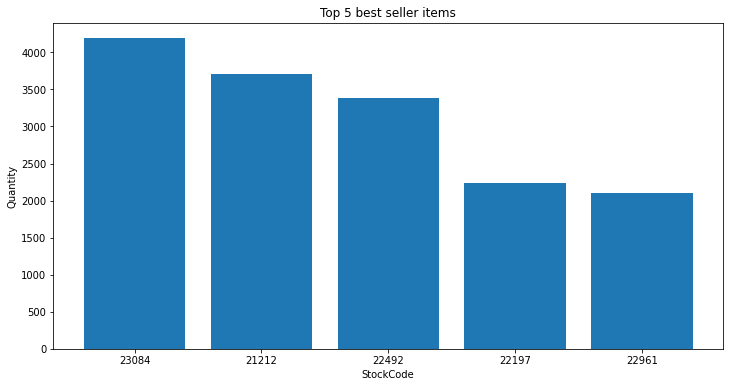

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(top5_items['StockCode'].astype('string'), top5_items['Quantity'])
plt.title('Top 5 best seller items')
plt.xlabel('StockCode')
plt.ylabel('Quantity')

StockCode 23084 bán chạy nhất với số lượng lên đến 4192 